In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files




Saving Screenshot 2025-04-30 142426.png to Screenshot 2025-04-30 142426.png
File uploaded: Screenshot 2025-04-30 142426.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


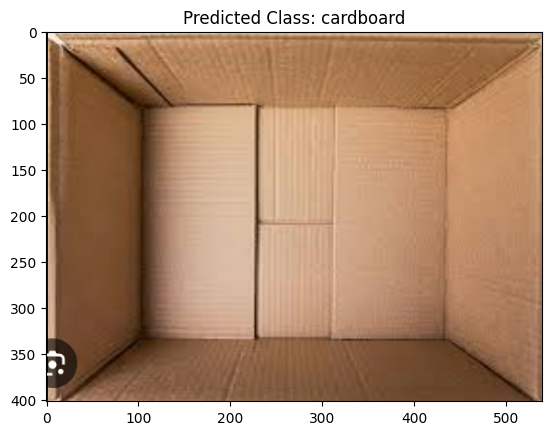

The predicted class for the image is: cardboard


In [5]:
# Memuat model yang telah dilatih
model = tf.keras.models.load_model('garbage_classification_model.h5')  # Ganti dengan path model Anda

# Fungsi untuk memuat dan memproses gambar
def prepare_image(img_path):
    # Memuat gambar dengan target size 224x224 (ukuran input model MobileNetV2)
    img = image.load_img(img_path, target_size=(224, 224))

    # Mengonversi gambar ke array NumPy
    img_array = image.img_to_array(img)

    # Normalisasi gambar ke rentang [0, 1]
    img_array = img_array / 255.0

    # Menambah dimensi batch (karena model mengharapkan input dengan dimensi batch)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Fungsi untuk menguji gambar dan menampilkan hasil prediksi
def predict_image(img_path):
    # Memuat dan mempersiapkan gambar
    img_array = prepare_image(img_path)

    # Melakukan prediksi
    predictions = model.predict(img_array)

    # Mengambil kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(predictions)

    # Mendapatkan nama kelas (misalnya, 'metal', 'glass', dll.)
    class_labels = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
    predicted_class = class_labels[predicted_class_index]

    # Menampilkan gambar dan hasil prediksi
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    return predicted_class

# Fungsi untuk mengunggah gambar melalui Colab
def upload_and_predict():
    uploaded = files.upload()  # Menggunakan Colab file upload

    # Mendapatkan path dari gambar yang diunggah
    for filename in uploaded.keys():
        print(f"File uploaded: {filename}")
        # Prediksi gambar yang diunggah
        predicted_class = predict_image(filename)
        print(f'The predicted class for the image is: {predicted_class}')

# Menjalankan fungsi upload dan prediksi
upload_and_predict()